# EDA (analisis exploratorio) - Dataset de Accidentes de aviones

## Imports

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from wordcloud import WordCloud

c:\Users\ANDREA\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


## 1. Lectura del conjunto de datos

In [13]:
df = pd.read_csv("AA_Cleaned.csv")

## 2. Exploración del Conjunto de Datos

In [41]:
df.head(5)

,date,time,Ruta,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,Passengers Aboard,crew_aboard,fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  5008 non-null   object 
 1   time                  3487 non-null   object 
 2   Ruta                  5003 non-null   object 
 3   operator              4998 non-null   object 
 4   flight_no             1326 non-null   object 
 5   route                 4246 non-null   object 
 6   ac_type               4995 non-null   object 
 7   registration          4736 non-null   object 
 8   cn_ln                 4341 non-null   object 
 9   all_aboard            4991 non-null   float64
 10  Passengers Aboard     4787 non-null   float64
 11  crew_aboard           4789 non-null   float64
 12  fatalities            5000 non-null   float64
 13  passenger_fatalities  4773 non-null   float64
 14  crew_fatalities       4773 non-null   float64
 15  ground               

In [43]:
print("Longitud del conjunto de datos:", len(df))
print("Número de características del conjunto de datos:", len(df.columns))

Longitud del conjunto de datos: 5008
Número de características del conjunto de datos: 17


## 2. Visualización de variables

### Número de accidentes por año:

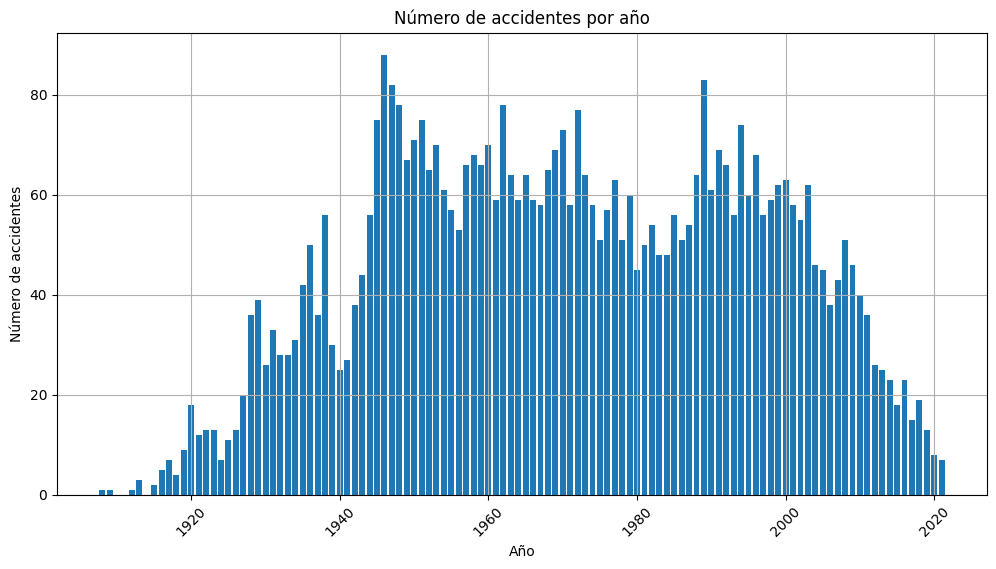

In [44]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

accident_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(accident_counts.index, accident_counts.values)
plt.xlabel('Año')
plt.ylabel('Número de accidentes')
plt.title('Número de accidentes por año')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Número de fatalidades por año:

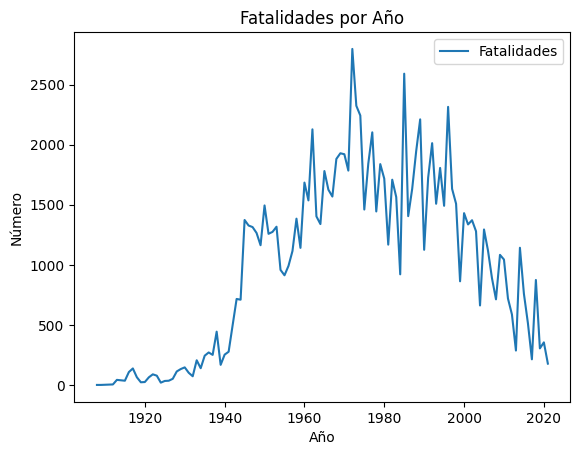

In [45]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year

fatalities_by_year = df.groupby('year')['fatalities'].sum()

plt.plot(fatalities_by_year.index, fatalities_by_year.values, label='Fatalidades')

plt.xlabel('Año')
plt.ylabel('Número')
plt.title('Fatalidades por Año')

plt.legend()

plt.show()

### Número de accidentes por país:

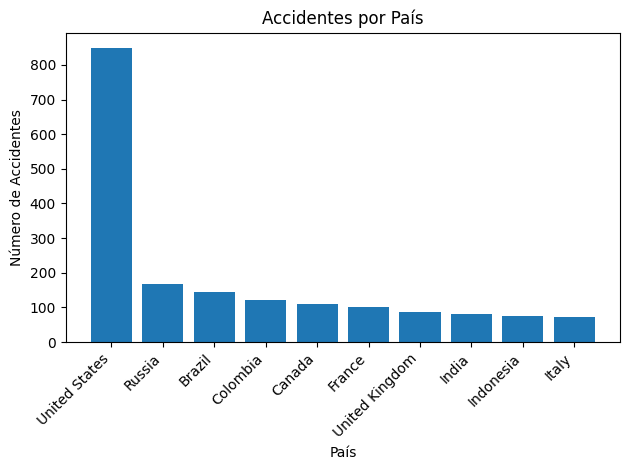

In [46]:

accidents_by_country = df2['Cleaned Country'].value_counts()
top_countries = accidents_by_country.head(10)
plt.bar(top_countries.index, top_countries.values)

plt.xlabel('País')
plt.ylabel('Número de Accidentes')
plt.title('Accidentes por País')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Número de accidentes por mes:

<AxesSubplot:title={'center':'Accidentes por Mes'}, xlabel='Mes', ylabel='Número de Accidentes'>

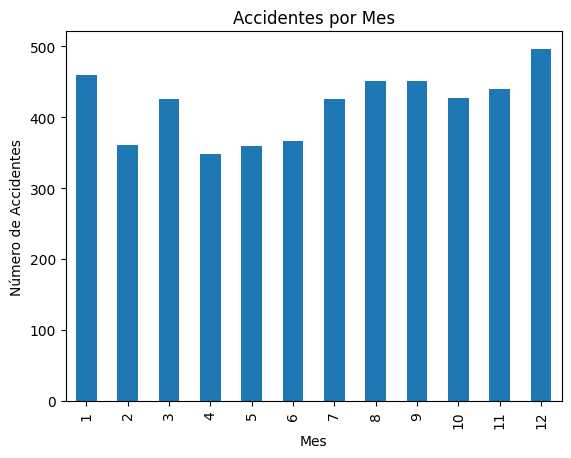

In [47]:
df['month'] = df['date'].dt.month
accidents_by_month = df['month'].value_counts().sort_index()
accidents_by_month.plot(kind='bar', xlabel='Mes', ylabel='Número de Accidentes', title='Accidentes por Mes')

### Número de accidentes por dia:

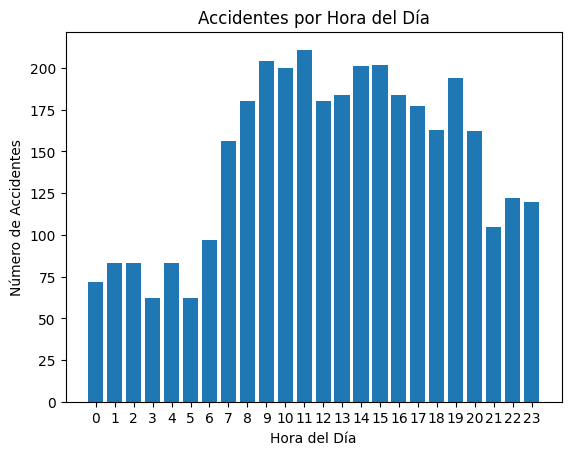

In [48]:

df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce').dt.hour
accidents_by_hour = df['hour'].value_counts().sort_index()
plt.bar(accidents_by_hour.index, accidents_by_hour.values)
plt.xlabel('Hora del Día')
plt.ylabel('Número de Accidentes')
plt.title('Accidentes por Hora del Día')
plt.xticks(range(24))
plt.show()

### Número de accidentes por operador:

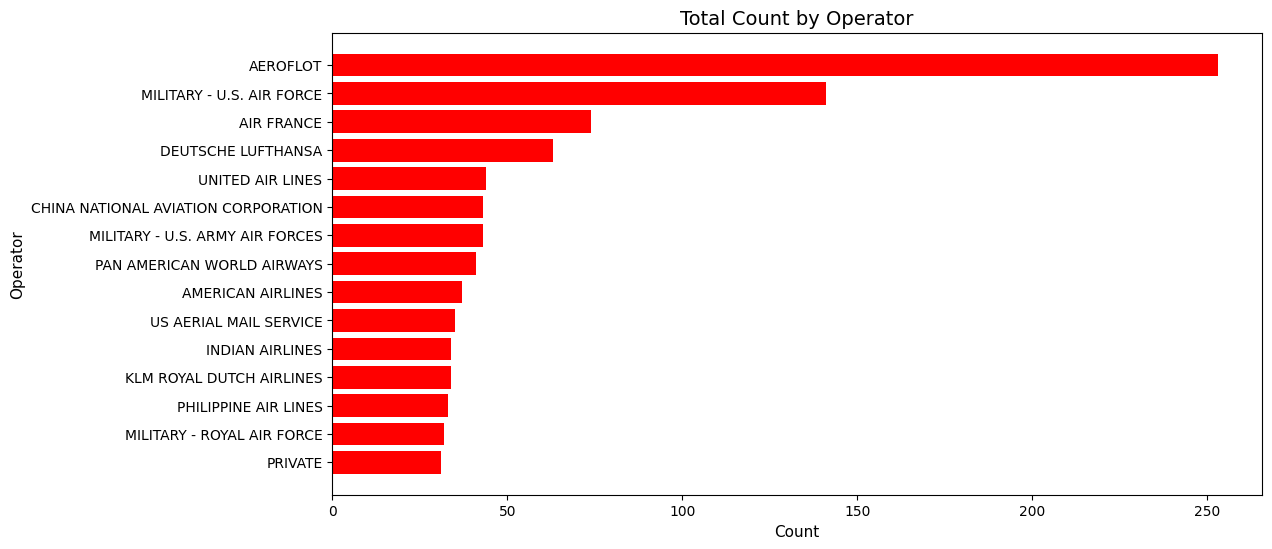

In [49]:
df['operator'] = df['operator'].str.upper()
df['operator'] = df['operator'].replace('A B AEROTRANSPORT', 'AB AEROTRANSPORT')

total_by_op = df.groupby('operator')[['operator']].count()
total_by_op = total_by_op.rename(columns={"operator": "Count"})
total_by_op = total_by_op.sort_values(by='Count', ascending=False).head(15)

plt.figure(figsize=(12, 6))
plt.barh(total_by_op.index, total_by_op['Count'], color='r')
plt.xlabel('Count', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Count by Operator', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

### Nube de palabras con la columna "summary":

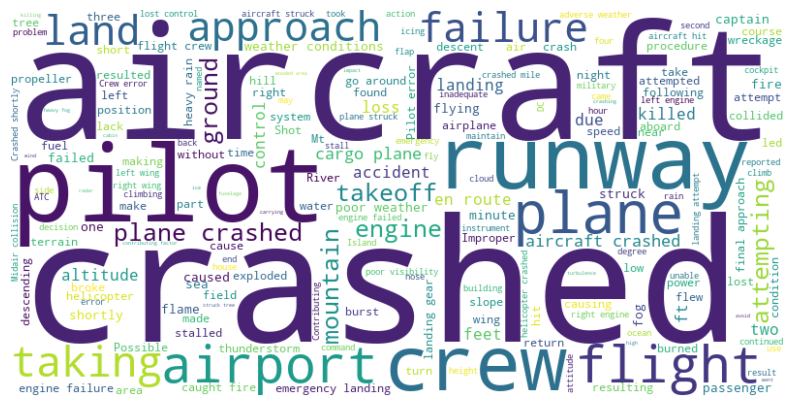

In [14]:
text = ' '.join(df['summary'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 2. Analisis estadistico:

In [ ]:
df.describe()

,all_aboard,Passengers Aboard,crew_aboard,fatalities,passenger_fatalities,crew_fatalities,ground,year
count,4991.000000,4787.000000,4789.000000,5000.000000,4773.000000,4773.000000,4964.000000,5008.000000
mean,31.121218,26.877376,4.519524,22.294000,18.940708,3.587262,1.718372,1970.851637
std,45.479965,44.035342,3.758072,35.000385,34.065190,3.177315,55.495544,24.703696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1908.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000,1951.000000
50%,16.000000,12.000000,4.000000,11.000000,7.000000,3.000000,0.000000,1970.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000,1992.000000
max,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000,2021.000000


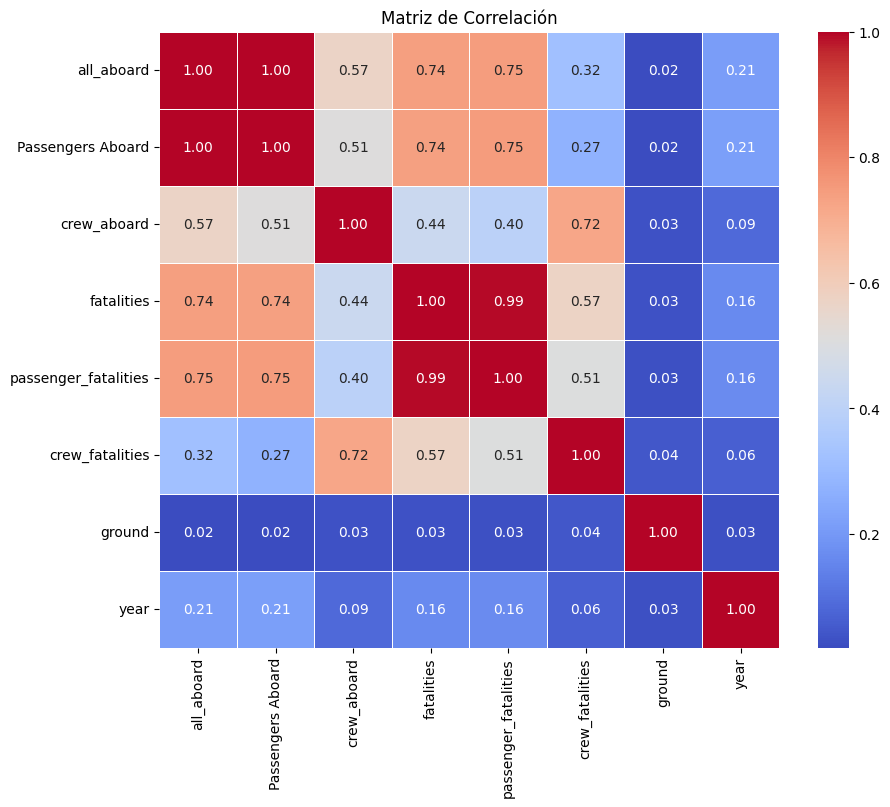

In [ ]:
numeric_variables = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_variables.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

### Análisis univariado :

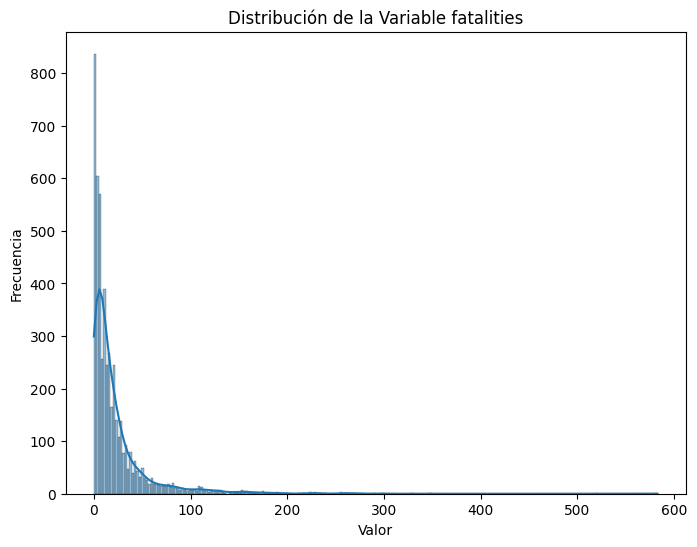

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='fatalities', kde=True)
plt.title('Distribución de la Variable fatalities')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

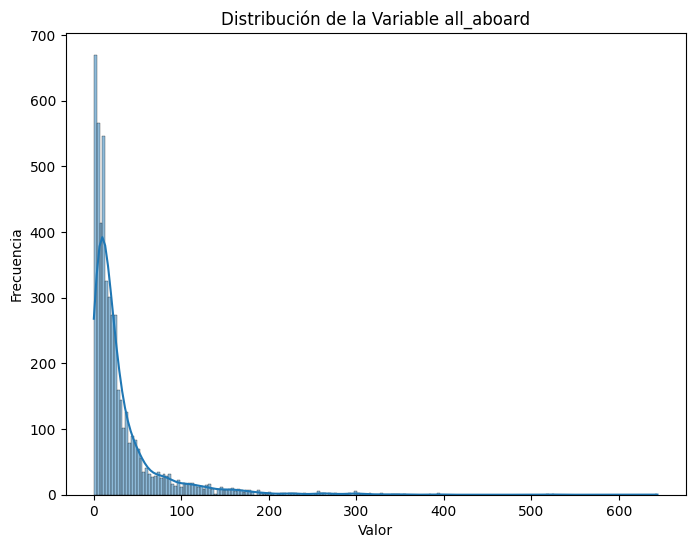

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='all_aboard', kde=True)
plt.title('Distribución de la Variable all_aboard')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

## 3. Forecasting:

05:08:17 - cmdstanpy - INFO - Chain [1] start processing
05:08:18 - cmdstanpy - INFO - Chain [1] done processing


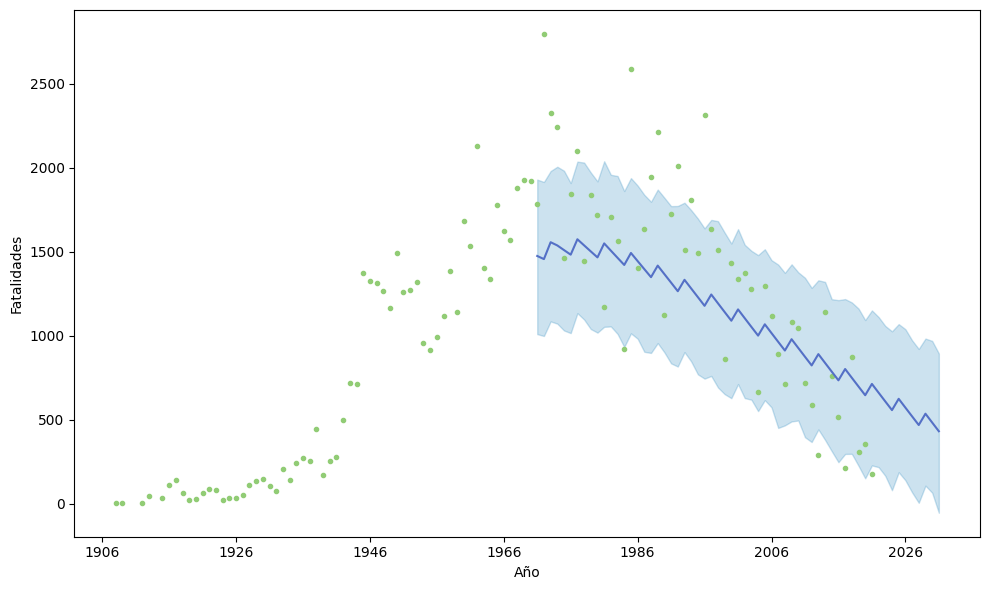

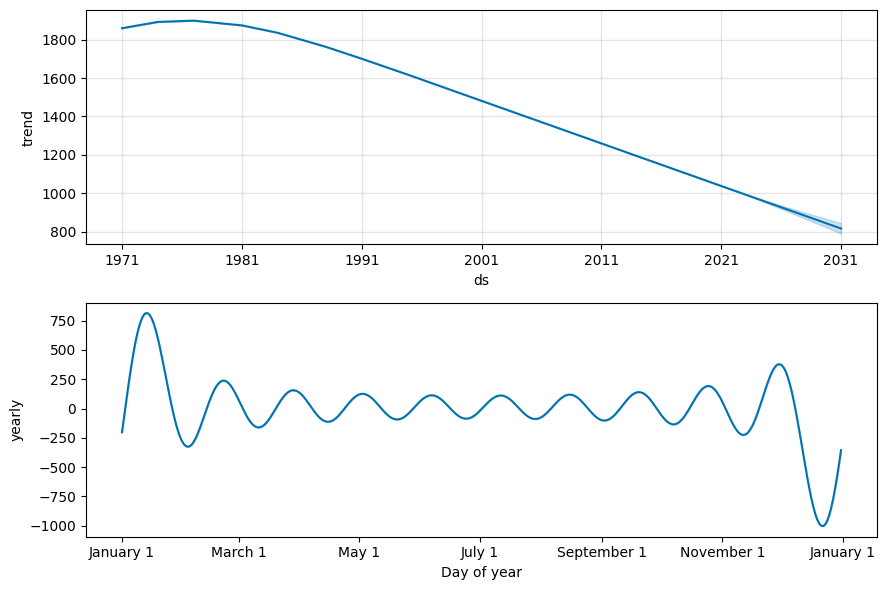

In [ ]:
df['fatalities'] = df['fatalities'].fillna(0)
df['all_aboard'] = df['all_aboard'].fillna(0)
df['passenger_fatalities'] = df['passenger_fatalities'].fillna(0)    
df['crew_fatalities'] = df['crew_fatalities'].fillna(0) 

data = df.groupby(df['date'].dt.year)['fatalities'].sum().reset_index()
data.columns = ['ds', 'y']

model = Prophet()
model.fit(data)

future = pd.date_range(start=data['ds'].min(), periods=len(data) - 50, freq='Y')
future = pd.DataFrame({'ds': future})

forecast = model.predict(future)

fig = model.plot(forecast)
plt.xlabel('Año')
plt.ylabel('Fatalidades')
plt.title("")
plt.grid(False) 
color = (145/255, 204/255, 117/255)
plt.gca().get_lines()[0].set_markerfacecolor(color)
plt.gca().get_lines()[0].set_markeredgecolor(color)
line_color = (84/255, 112/255, 198/255)  
lines = plt.gca().get_lines()
for line in lines:
    line.set_color(line_color)

fig = model.plot_components(forecast)
plt.grid(False) 
plt.show()

## 4. Encontar outliers de valores numericos

In [11]:
df = pd.read_csv("AA_Cleaned.csv")

columns_to_drop = ['time', 'summary', 'Ruta', 'flight_no', 'operator', 'route', 'registration', 'ac_type', 'cn_ln']
df = df.drop(columns_to_drop, axis=1)

numeric_columns = df.select_dtypes(include=[np.number])

top_highest = {}
top_lowest = {}
for column in numeric_columns.columns:
    if column == 'date':
        continue  
    top_highest[column] = df.nlargest(3, column)
    top_lowest[column] = df.nsmallest(3, column)

print("Top 3 de filas con los valores más altos:")
for column, top_rows in top_highest.items():
    print(f"Columna: {column}")
    print(pd.merge(top_rows, df[['date']], left_index=True, right_index=True))
    print()

print("Top 3 de filas con los valores más bajos:")
for column, top_rows in top_lowest.items():
    print(f"Columna: {column}")
    print(pd.merge(top_rows, df[['date']], left_index=True, right_index=True))
    print()

Top 3 de filas con los valores más altos:
Columna: all_aboard
          date_x  all_aboard  Passengers Aboard  crew_aboard  fatalities  \
2902  1977-03-27       644.0              614.0         30.0       583.0   
3341  1985-08-12       524.0              509.0         15.0       520.0   
4219  1999-07-23       517.0              503.0         14.0         1.0   

      passenger_fatalities  crew_fatalities  ground      date_y  
2902                 560.0             23.0     0.0  1977-03-27  
3341                 505.0             15.0     0.0  1985-08-12  
4219                   0.0              1.0     0.0  1999-07-23  

Columna: Passengers Aboard
          date_x  all_aboard  Passengers Aboard  crew_aboard  fatalities  \
2902  1977-03-27       644.0              614.0         30.0       583.0   
3341  1985-08-12       524.0              509.0         15.0       520.0   
4219  1999-07-23       517.0              503.0         14.0         1.0   

      passenger_fatalities  crew_fat

### metodo del rango intercuartil

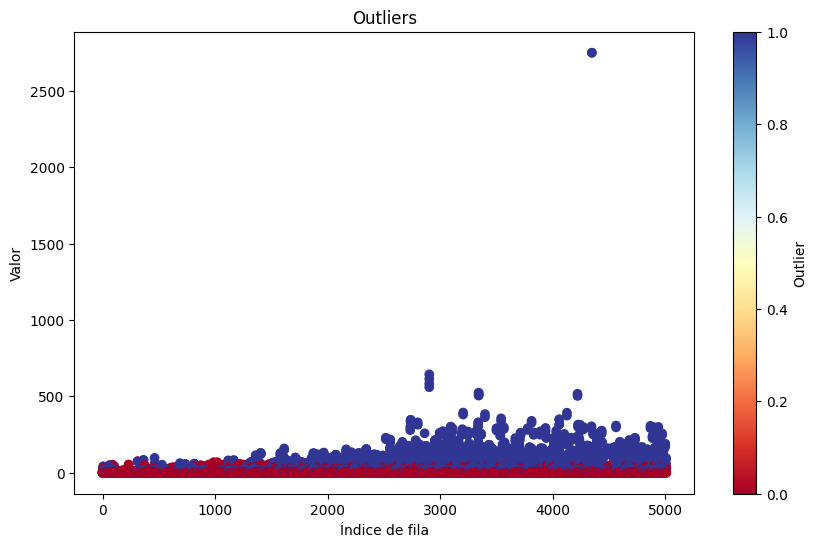

In [12]:
df = df.drop(['date'], axis=1)

numeric_columns = df.select_dtypes(include=[np.number])

Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (numeric_columns < lower_bound) | (numeric_columns > upper_bound)

plt.figure(figsize=(10, 6))
for column in outliers.columns:
    plt.scatter(range(len(df)), df[column], c=outliers[column], cmap='RdYlBu')
plt.xlabel('Índice de fila')
plt.ylabel('Valor')
plt.title('Outliers')
plt.colorbar(label='Outlier')
plt.show()